In [1]:
import matplotlib.pyplot as plt
import sarracen as src
import numpy as np

/users/labnet/st2/jjnarvaezcor/virtual-env/lib/python3.8/site-packages/sarracen/kernels/cubic_spline.py:15: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit(fastmath=True)
/users/labnet/st2/jjnarvaezcor/virtual-env/lib/python3.8/site-packages/sarracen/kernels/quartic_spline.py:15: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit(fastmath=True)
/users/labnet/

In [2]:
dm = 1/1000
hfact = 1.2

In [3]:
sdf_ini = src.read_csv('../Data/initial_distribution/toy_star.csv')
sdf_ini.params={'mass':dm, 'hfact':hfact}
sdf_ini.calc_density()
sdf_ini

,x,y,z,vx,vy,vz,h,u,rho
0,-0.545853,-0.358428,0.060610,0,0,0,0.014508,0,565.884242
1,-0.019900,-0.089172,0.128558,0,0,0,0.014508,0,565.884242
2,-0.028214,0.081889,-0.688266,0,0,0,0.014508,0,565.884242
3,-0.300558,0.026892,-0.472094,0,0,0,0.014508,0,565.884242
4,0.038164,-0.557702,-0.009428,0,0,0,0.014508,0,565.884242
...,...,...,...,...,...,...,...,...,...
995,0.208194,-0.060404,-0.240565,0,0,0,0.014508,0,565.884242
996,0.639992,-0.239642,0.238841,0,0,0,0.014508,0,565.884242
997,-0.125684,-0.133795,0.635685,0,0,0,0.014508,0,565.884242
998,-0.313519,-0.439521,0.408774,0,0,0,0.014508,0,565.884242


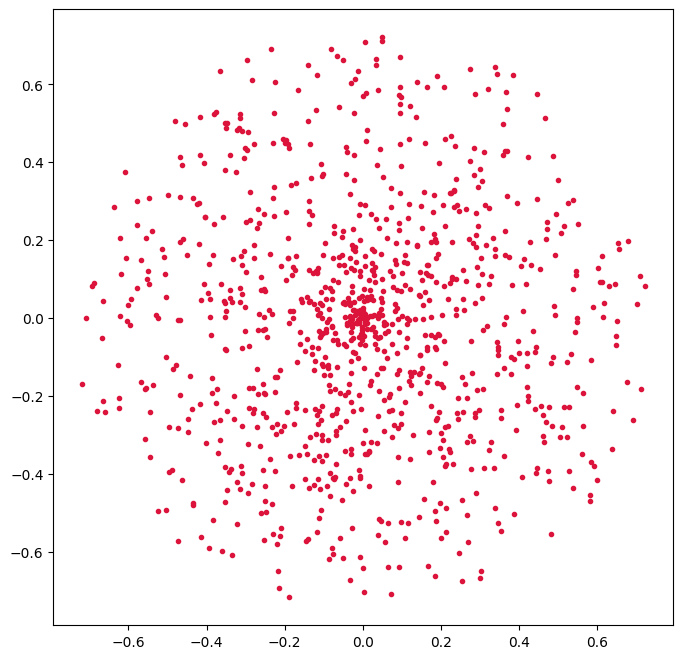

In [4]:
fig = plt.figure(figsize=(8,8))
plt.plot(sdf_ini['x'], sdf_ini['y'], '.', color='crimson')
plt.show()

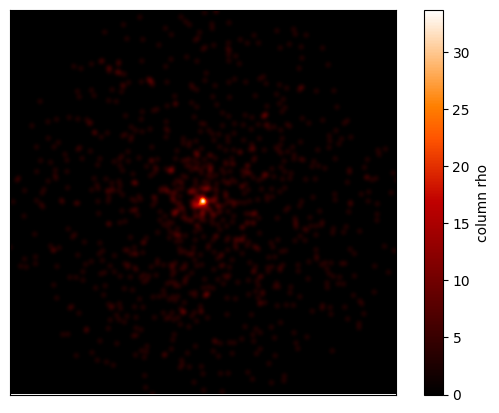

In [5]:
fig, ax = plt.subplots(figsize=(7,5))
ax = sdf_ini.render('rho', ax=ax, rotation=[0,0,0])

In [6]:
sdf = src.read_csv('../Data/results/toy_star/final.csv')
sdf.params={'mass':dm, 'hfact':hfact}
sdf.calc_density()
sdf

,x,y,z,vx,vy,vz,h,u,rho
0,-0.281849,-0.135624,0.037227,-0.000138,0.000378,0.000276,0.080419,1.578074,3.322553
1,-0.003247,-0.045003,0.058725,-0.000625,0.000458,-0.000430,0.054860,1.578655,10.465947
2,-0.045068,0.133308,-0.202491,0.000011,-0.000062,-0.000100,0.065507,1.577978,6.147118
3,-0.103340,0.049081,-0.095816,0.000620,-0.000300,0.000404,0.057280,1.578119,9.194455
4,0.014959,-0.246696,-0.035499,0.001254,-0.000372,-0.000629,0.065914,1.578301,6.033967
...,...,...,...,...,...,...,...,...,...
995,0.125529,-0.035396,-0.044301,0.000938,-0.000502,0.000546,0.056773,1.577982,9.442947
996,0.303296,-0.059849,0.060753,-0.000064,0.000198,-0.000429,0.080320,1.578353,3.334828
997,-0.118925,-0.123230,0.264049,0.000454,-0.000105,0.000148,0.080294,1.578866,3.338038
998,-0.166646,-0.225402,0.142864,-0.000647,0.000767,0.000500,0.080208,1.578490,3.348834


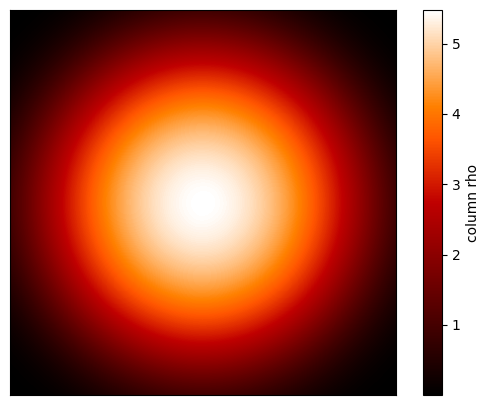

In [7]:
fig, ax = plt.subplots(figsize=(7,5))
ax = sdf.render('rho', ax=ax, rotation=[0,0,0])

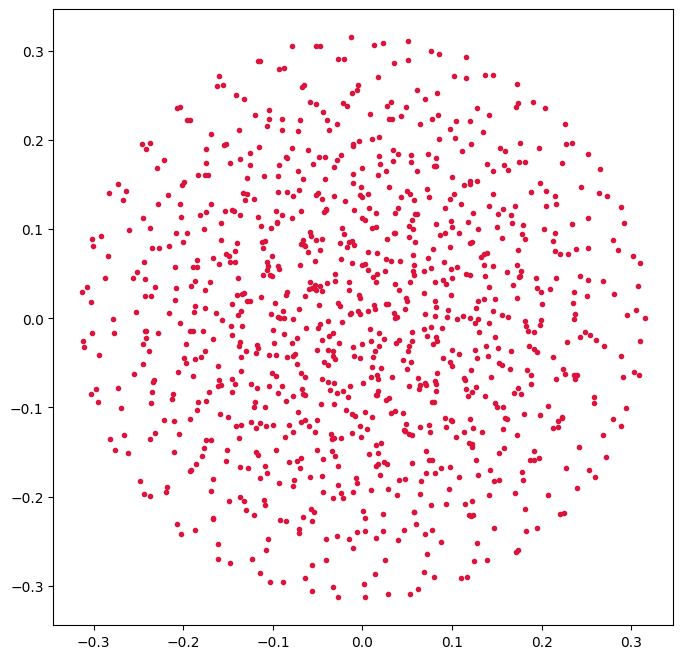

In [8]:
fig = plt.figure(figsize=(8,8))
plt.plot(sdf['x'], sdf['y'], '.', color='crimson')
plt.show()

# Density Distribution

In [9]:
def density_theo(r, R, lmbda, k):
    return lmbda/(4*k)*(R**2-r**2)

In [10]:
R = 0.75
k = 0.05
M = 2.0
n = 1.0
gamma = 2.0
#lmbda = 2*k / (np.pi**(1/n)) * (M*(1+n)/R**2)**(1+1/n)/M
lmbda = 4.*k/np.pi**(1.5) * (3.32335 * M/(R*R*R))/(R*R);

In [11]:
4./3.*np.pi*R**3. *sum(sdf['rho'])

11061.558942242307

In [12]:
r = np.linspace(0.001, 1.1*R, 100)
dens = density_theo(r, R, lmbda, k)

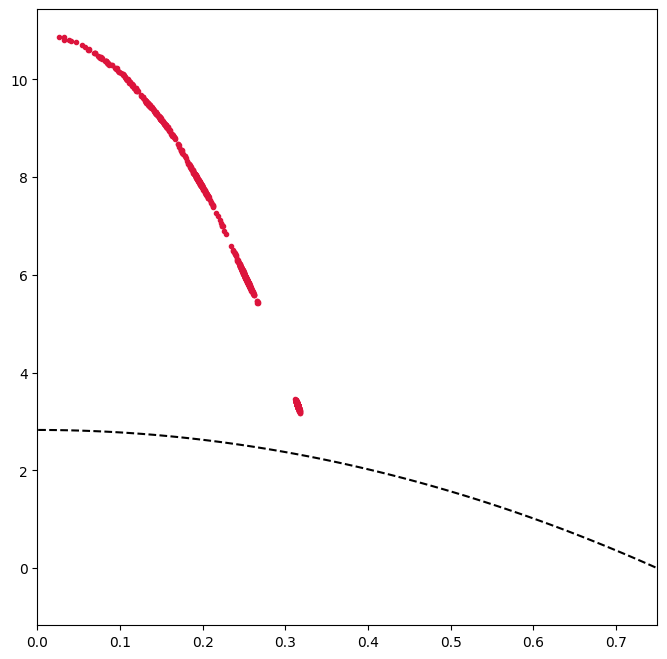

In [13]:
fig = plt.figure(figsize=(8,8))
plt.plot(np.sqrt(sdf['x']**2+sdf['y']**2+sdf['z']**2), sdf['rho'], '.', color='crimson')
plt.plot(r, dens, '--', color='k')
plt.xlim(0., R)
plt.show()